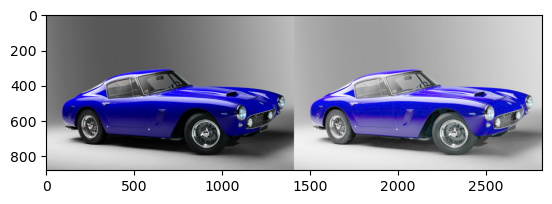

In [26]:
#gamma dönüşümü
import cv2
import numpy as np
from matplotlib import pyplot as plt

def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv2.LUT(src, table)


img = cv2.imread('araba.jpg')
gammaImg = gammaCorrection(img, 2.2)

res = np.hstack((img,gammaImg))
plt.imshow(res)
plt.show()

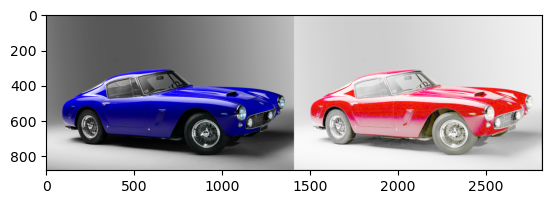

In [27]:
#logaritmik dönüşüm

 


import cv2 as cv

from PIL import Image

from PIL import ImageFilter

import math


def logTransform(c, f):

    g = c * math.log(float(1 + f),10);

    return g;


def logTransformImage(image, outputMax = 255, inputMax=255):

    c = outputMax/math.log(inputMax+1,10);



   

    for i in range(0, img.size[0]-1):

        for j in range(0, img.size[1]-1):

           

            f = img.getpixel((i,j));



            

            redPixel    = round(logTransform(c, f[0]));

            greenPixel  = round(logTransform(c, f[1]));

            bluePixel   = round(logTransform(c, f[2]));

 

           

            img.putpixel((i,j),(redPixel, greenPixel, bluePixel));

 

    return image;





imageFileName = "araba.jpg";

img = Image.open(imageFileName);

img1 = cv.imread("araba.jpg")

logTransformedImage = logTransformImage(img);

res = np.hstack((img1,logTransformedImage))
plt.imshow(res)
plt.show()

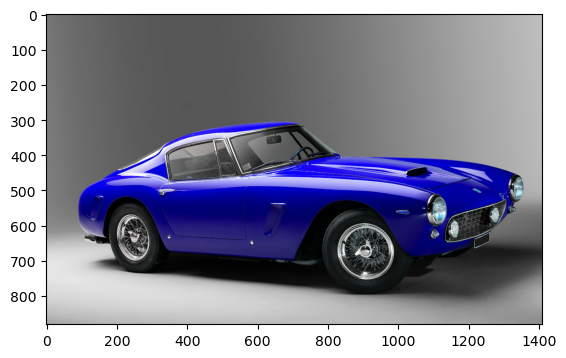

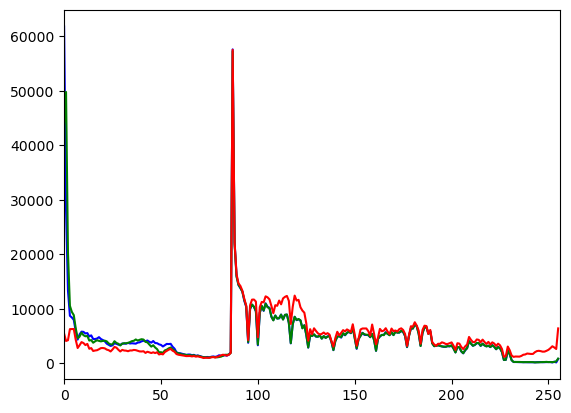

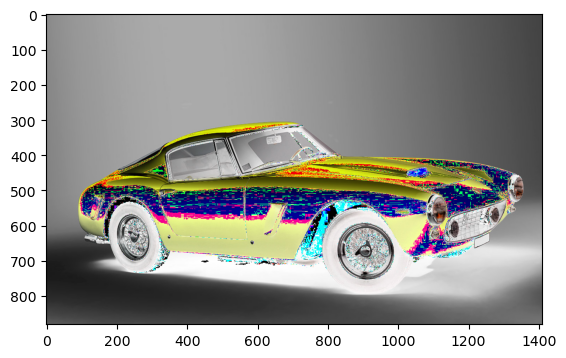

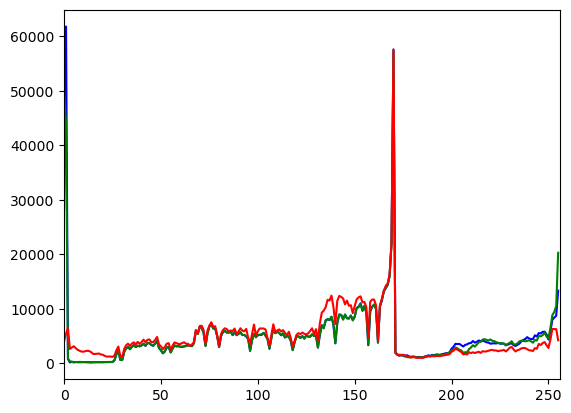

In [5]:
#negatifini alma

import cv2
import matplotlib.pyplot as plt
  
img_bgr = cv2.imread('araba.jpg', 1)
  
plt.imshow(img_bgr)
plt.show()
  

color = ('b', 'g', 'r')
  
for i, col in enumerate(color):
      
    histr = cv2.calcHist([img_bgr],
                         [i], None,
                         [256],
                         [0, 256])
      
    plt.plot(histr, color = col)
      
    plt.xlim([0, 256])
      
plt.show()
  

img_neg = 1 - img_bgr
  
plt.imshow(img_neg)
plt.show()

color = ('b', 'g', 'r')
  
for i, col in enumerate(color):
      
    histr = cv2.calcHist([img_neg],
                         [i], None, 
                         [256],
                         [0, 256])
      
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
      
plt.show()

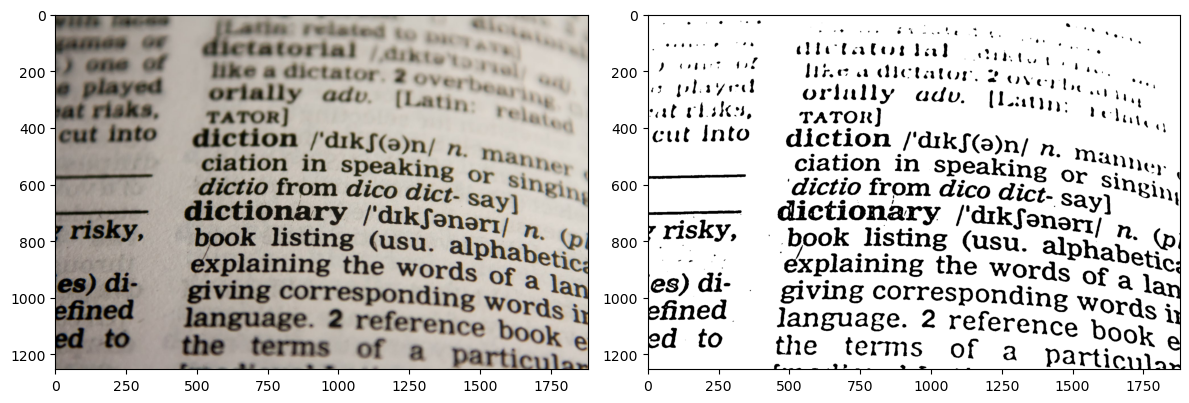

In [28]:
#üzerinde metin olan resmin yazılarını netleştirme 

import cv2
import matplotlib.pyplot as plt


img = cv2.imread('kitap.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)


mask = cv2.adaptiveThreshold(blurred, 
                              255, 
                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                              cv2.THRESH_BINARY, 
                              31, 
                              10)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.tight_layout()

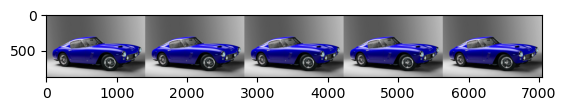

In [29]:
#gri ölçekli resmi 8,16,24 bite çevir 
img = cv2.imread('araba.jpg')
img8 = img.astype('uint8')
img16 = img.astype('uint16')
img32 = img.astype('uint32')
img64 = img.astype('uint64')
res = np.hstack((img,img8,img16,img32,img64))
plt.imshow(res)
plt.show()

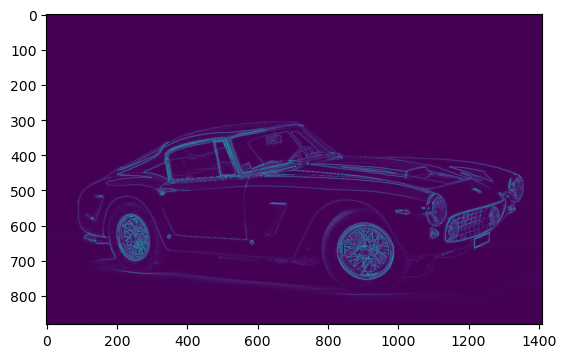

In [30]:
#Sobel - Prewitt - Robert cross filtreleme 

import cv2 
import numpy as np
from scipy import ndimage
  
roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )
  
roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )
  
img = cv2.imread('araba.jpg',0).astype('float64')
img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )
  
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255
cv2.imwrite("output.jpg",edged_img)
plt.imshow(edged_img)
plt.show()

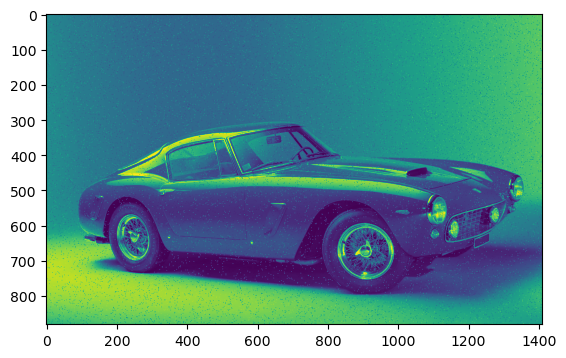

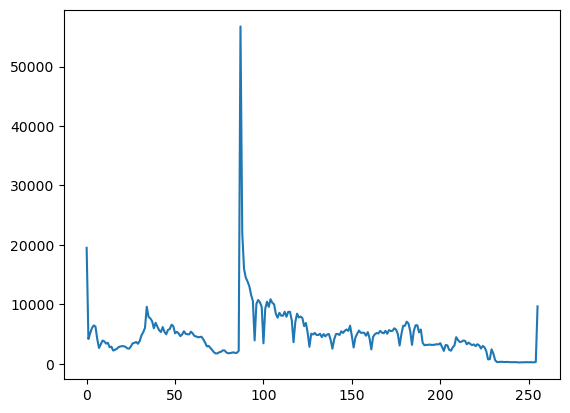

In [31]:
#Tuz biber görüntü oluştur ve histogram çıkarma
import random
import cv2
 
def add_noise(img):
    row , col = img.shape
    number_of_pixels = random.randint(1000, 10000)
    for i in range(number_of_pixels):

        y_coord=random.randint(0, row - 1)

        x_coord=random.randint(0, col - 1)

        img[y_coord][x_coord] = 255

    number_of_pixels = random.randint(1000 , 10000)
    for i in range(number_of_pixels):

        y_coord=random.randint(0, row - 1)
 
        x_coord=random.randint(0, col - 1)
 
        img[y_coord][x_coord] = 0
         
    return img
 

img = cv2.imread('araba.jpg',cv2.IMREAD_GRAYSCALE)
 
cv2.imwrite('salt-and-pepper-test.jpg',add_noise(img))
noise=add_noise(img)
plt.imshow(noise)
plt.show()
histr = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histr)
plt.show()